In [1]:
import pandas as pd
import numpy as np
# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Get Data Train 

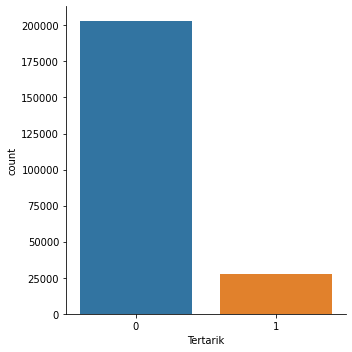

In [2]:
df = pd.read_csv("dataset/kendaraan_train_clean.csv")
df_test = pd.read_csv("dataset/kendaraan_test_clean.csv")

sns.catplot(x='Tertarik', data=df, kind='count')

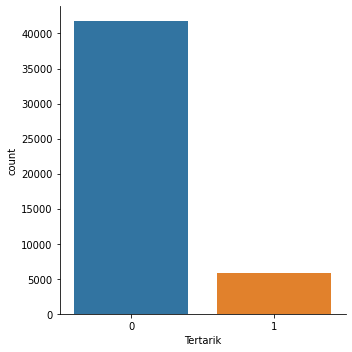

In [3]:
sns.catplot(x='Tertarik', data=df_test, kind='count')

## Feature Selection

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

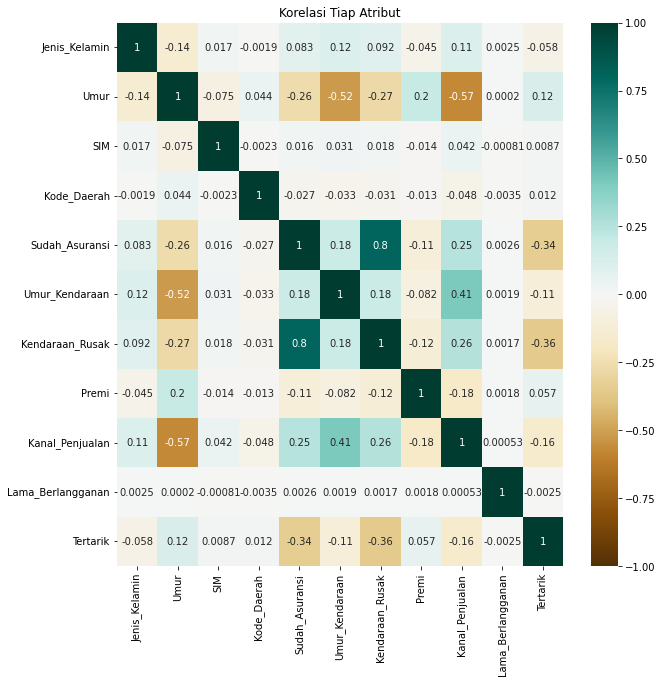

In [4]:
corr = df.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Tiap Atribut')

In [5]:
# df = df[["Jenis_Kelamin", "Umur", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Umur_Kendaraan", "Premi", "Kanal_Penjualan", "Lama_Berlangganan", "Tertarik"]]
# df = df[["Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Lama_Berlangganan", "Tertarik"]]

## Memisahkan kolom tertarik

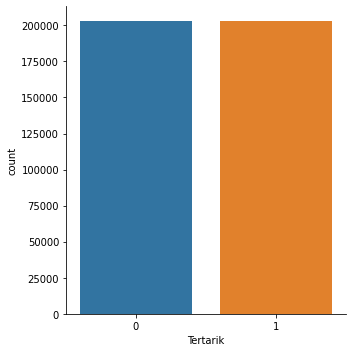

In [6]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

# undersample = RandomUnderSampler(sampling_strategy='majority')
# x_data, y_data = undersample.fit_resample(x_data, y_data)

smt = SMOTE()
x_data, y_data = smt.fit_resample(x_data, y_data)

afterSampling = pd.DataFrame({'Tertarik': y_data})

sns.catplot(x='Tertarik', data=afterSampling, kind='count')

## Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(X_train.shape, "-", y_train.shape)
print(X_test.shape, "-", y_test.shape)

(324804, 10) - (324804,)
(81202, 10) - (81202,)


## Naive Bayes Classifier

### Initiate Pre data

In [8]:
def initiatePredata(features, target):
  categories = np.unique(target)  
  rows, feature_nums = features.shape  
  mean = features.groupby(target).mean().to_numpy()
  print(mean)
  var = features.groupby(target).var().to_numpy()
    
  return categories, rows, mean, var

### Calculate Prior 

In [9]:
def calcPrior(df, Y, classes):    
  priors = []
  for i in classes:
      prior = len(df[Y==i])/len(df)
      priors.append(prior)
  return priors

### Calculate Gaussian 

In [10]:
def calcGaussianDensity(class_idx, x, mean, var):
  mean = mean[class_idx]
  var = var[class_idx]
  numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
  denominator = np.sqrt(2 * np.pi * var)
  prob = numerator / denominator
  return prob

### Calculate Posterior

In [11]:
def calcPosterior(x, prior, categories, mean, var):
  posteriors = []
  # menghitung probabilitas posterior untuk tiap kolom
  for i in range(len(categories)):
      pr = np.log(prior[i]) 
      conditional = np.sum(np.log(calcGaussianDensity(i, x, mean, var))) 
      posterior = pr + conditional
      posteriors.append(posterior)
  return categories[np.argmax(posteriors)]

In [12]:
# def calculate_predata(features, target):
#   categories = np.unique(target)  
#   rows, feature_nums = features.shape  
#   mean = features.groupby(target).mean().to_numpy()
#   print(mean)
#   var = features.groupby(target).var().to_numpy()
    
#   return categories, rows, mean, var

### Main Function

In [13]:
def naiveBayes(features, target, test_features):
  categories, rows, mean, var = initiatePredata(features, target)  
  prior = calcPrior(features, target, categories)
  # preds = [calc_posterior(feat, prior, categories, mean, var) for f in test_features.to_numpy()]
  predicts = []
  for feat in test_features.to_numpy():
    predicts.append(calcPosterior(feat, prior, categories, mean, var))
  return predicts

In [14]:
def accuracy(y_test, y_pred):
  accuracy = np.sum(y_test == y_pred) / len(y_test)
  return accuracy

## Train Model with Dataset Train

[[0.47628182 0.26992818 0.99794589 0.50804302 0.54046521 0.28082745
  0.57624006 0.5270456  0.70595099 0.49947535]
 [0.38961844 0.35438151 0.99918562 0.51587051 0.02679729 0.18527954
  0.04055899 0.5538325  0.5481178  0.49699629]]
81202


<AxesSubplot:>

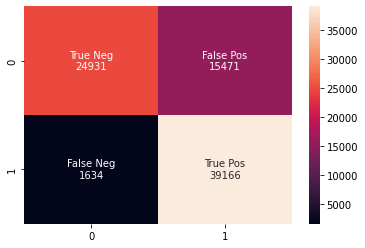

In [15]:

# x = NaiveBayesClassifier()
preds = naiveBayes(X_train, y_train, X_test)
print(len(preds))
conf_matrix = confusion_matrix(y_test, preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

In [16]:
print(classification_report(y_test, preds))
accur = accuracy(y_test, preds)
accur

              precision    recall  f1-score   support

           0       0.94      0.62      0.74     40402
           1       0.72      0.96      0.82     40800

    accuracy                           0.79     81202
   macro avg       0.83      0.79      0.78     81202
weighted avg       0.83      0.79      0.78     81202



0.7893524790029802

## Predict Data and Evaluate with Dataset Test

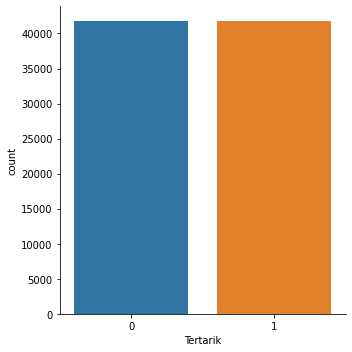

In [17]:
x_testt = df_test.drop("Tertarik", axis=1)
y_testt = df_test["Tertarik"]

smt = SMOTE()
x_testt, y_testt = smt.fit_resample(x_testt, y_testt)


afterSampling = pd.DataFrame({'Tertarik': y_testt})

sns.catplot(x='Tertarik', data=afterSampling, kind='count')

[[0.47628182 0.26992818 0.99794589 0.50804302 0.54046521 0.28082745
  0.57624006 0.5270456  0.70595099 0.49947535]
 [0.38961844 0.35438151 0.99918562 0.51587051 0.02679729 0.18527954
  0.04055899 0.5538325  0.5481178  0.49699629]]
83556


<AxesSubplot:>

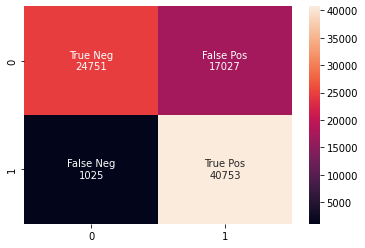

In [18]:
predstest = naiveBayes(X_train, y_train, x_testt)
print(len(predstest))
conf_matrix = confusion_matrix(y_testt, predstest)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

In [19]:
print(classification_report(y_testt, predstest))


              precision    recall  f1-score   support

           0       0.96      0.59      0.73     41778
           1       0.71      0.98      0.82     41778

    accuracy                           0.78     83556
   macro avg       0.83      0.78      0.78     83556
weighted avg       0.83      0.78      0.78     83556

